In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/Shareddrives/302 Project/Data/GameSales.csv')
df = df.dropna(subset=['total_sales', 'release_date', 'console'])
top_consoles = ['3DS', 'DS', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360', 'XB', 'XOne']

df = df[df['console'].isin(top_consoles)]
df = df[df['total_sales'] > 1]
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

df = df.groupby(by=(['console', 'release_year']))['total_sales'].count().reset_index()
df = df.sort_values(by="console", ascending=True)
df.head(10)


#df2 = df.groupby(by=(['console']))['total_sales'].sum().reset_index()
#df2 = df2[df2['total_sales'] > 100]
#df = df.sort_values(by="total_sales", ascending=False)
#df2.head(15)




,console,release_year,total_sales
0,3DS,2011,2
1,3DS,2012,1
2,3DS,2013,2
3,3DS,2017,3
9,DS,2011,5
8,DS,2010,6
7,DS,2009,14
10,DS,2012,1
5,DS,2007,23
4,DS,2006,5


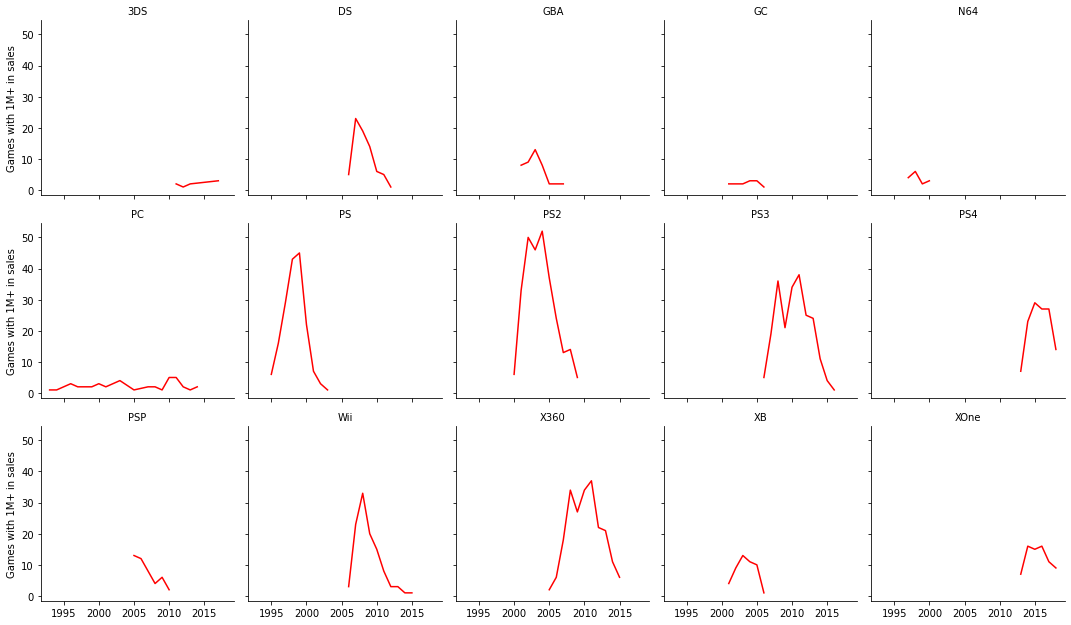

In [ ]:
g = sns.FacetGrid(df, col="console", col_wrap=5)
g.map(sns.lineplot, "release_year", "total_sales", color="red")

#for ax in g.axes.flat:
#    labels = ax.get_xticklabels() # get x labels
#    for i,l in enumerate(labels):
#        txt = labels[i].get_text()
#        if(txt != "1995" and txt != "2000" and txt != "2005" and txt != "2010" and txt != "2015"): labels[i] = ''
#    ax.set_xticklabels(labels) # set new labels

g.set_xlabels("")
g.set_ylabels("Games with 1M+ in sales")
g.set_titles(col_template="{col_name}")